<a href="https://colab.research.google.com/github/omar1slam/Random-ML-Scripts/blob/master/Optimization%20of%20polynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

minimum point: [ 0.505 -0.197 -0.527]
local minmum of F(x1,x2,x3)
0.0021243831651996475
Number of iterations: 14


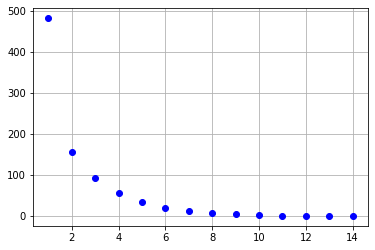

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#//////////////////////////////////////////////////Conventional Gradient Descent/////////////////////////////////////////////////////////
X0 = np.array([0.5,-0.5,0.5])
Xnew = np.array([0,0,0])
eeta = 0.001
Epsilon = 1e-06
i = 0

def g1(x1,x2,x3):
  y= 3*x1-m.cos(x2*x3)-0.5
  return y
def g2(x1,x2,x3):
  y= x1**2-81*(x2+0.1)**2+m.sin(x3)+1.06
  return y
def g3(x1,x2,x3):
  return m.exp(-x1*x2)+20*x3+(10*m.pi-3)/3

def F(x1,x2,x3):
  return 0.5*(g1(x1,x2,x3))**2 + 0.5*(g2(x1,x2,x3))**2 + 0.5*(g3(x1,x2,x3))**2

gradient = np.array([1,2,3])
def F1(x1,x2,x3):
  return (g1(x1,x2,x3))*3 +(g2(x1,x2,x3))*2*x1+(g3(x1,x2,x3))*m.exp(-x1*x2)*-x2
def F2(x1,x2,x3):
  return (g1(x1,x2,x3))*m.sin(x2*x3)*x3 + (g2(x1,x2,x3))*(-162*(x2+0.1))+(g3(x1,x2,x3))*m.exp(-x1*x2)*-x1
def F3(x1,x2,x3):
  return (g1(x1,x2,x3))*m.sin(x2*x3)*x2 + (g2(x1,x2,x3))*m.cos(x3)+ 20*(g3(x1,x2,x3))

gradient[0] = F1(X0[0],X0[1],X0[2])
gradient[1] = F2(X0[0],X0[1],X0[2])
gradient[2] = F3(X0[0],X0[1],X0[2])

def Gradient_Magnitude():
  return m.sqrt((gradient[0])**2+(gradient[1])**2+(gradient[2])**2)

while Gradient_Magnitude() > Epsilon:
  Xnew = X0 - eeta*gradient
  X0 = Xnew
  i = i+1
  gradient[0] = F1(X0[0],X0[1],X0[2])
  gradient[1] = F2(X0[0],X0[1],X0[2])
  gradient[2] = F3(X0[0],X0[1],X0[2])
  plt.figure(1)
  plt.plot(i,Gradient_Magnitude(),'bo')
  plt.grid(True)

print("minimum point:",Xnew)
print("local minmum of F(x1,x2,x3)")
print(F(Xnew[0],Xnew[1],Xnew[2]))
print("Number of iterations:",i)


minimum point: [ 0.53113576  0.00145437 -0.52470779]
local minmum of F(x1,x2,x3)
0.0046533717528511424
Number of iterations: 9


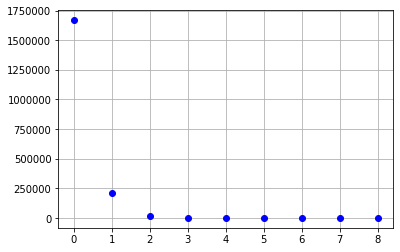

In [ ]:
#/////////////////////////////////////////////////////Newton-Raphson Gradient Descent///////////////////////////////////////////////
def F11(x1,x2,x3):
  return 9 + 2*(g2(x1,x2,x3))+4*x1**2 + (g3(x1,x2,x3))*(x2**2)*m.exp(-x1*x2)+(x2**2)*m.exp(-2*x1*x2)
def F12(x1,x2,x3):
  return 3*x3*m.sin(x2*x3) + 2*x1*(-162*(x2+0.1)) - (g3(x1,x2,x3))*m.exp(-x1*x2) + (g3(x1,x2,x3))*x1*x2*m.exp(-x1*x2) + x1*x2*m.exp(-2*x1*x2)
def F13(x1,x2,x3):
  return 3*x2*m.sin(x2*x3)+2*x1*m.cos(x3) - 20*x2*m.exp(-x1*x2)
def F21(x1,x2,x3):
  return 3*x3*m.sin(x2*x3) + (-162*(x2+0.1))*2*x1 + m.exp(-2*x1*x2)*(x1*x2) + (g3(x1,x2,x3))*x1*x2*m.exp(-x1*x2)-(g3(x1,x2,x3))*m.exp(-x1*x2)
def F22(x1,x2,x3):
  return -(g1(x1,x2,x3))*x3*m.cos(x2*x3)+m.sin(x2*x3)*m.sin(x2*x3)*x3**2+x1*x2*m.exp(-2*x1*x2)-(g3(x1,x2,x3))*m.exp(-x1*x2)+(g3(x1,x2,x3))*m.exp(-x1*x2)*x1**2 + 26244*x2**2 + 5248.8*x2 + 262.44 
def F23(x1,x2,x3):
  return x2*x3*m.sin(x2*x3)*m.sin(x2*x3) - (g1(x1,x2,x3))*x3*x2*m.cos(x2*x3) + (g1(x1,x2,x3))*m.sin(x2*x3) + m.cos(x3) * (-162*(x2+0.1)) - 20 *x1 *m.exp(-x1*x2)
def F31(x1,x2,x3):
  return 3*x2*m.sin(x2*x3) + 2*x1*m.cos(x3) -20*x2*m.exp(-x1*x2)
def F32(x1,x2,x3):
  return x2*x3*m.sin(x2*x3)*m.sin(x2*x3) + (g1(x1,x2,x3))*m.sin(x2*x3) + (g1(x1,x2,x3))*x2*x3*m.sin(x2*x3) + m.cos(x3)*(-162*(x2+0.1)) - 20*x1*m.exp(-x1*x2)
def F33(x1,x2,x3):
  return (x2**2)*(m.sin(x2*x3))**2 + (g1(x1,x2,x3))*m.cos(x2*x3)*x2**2 + (m.cos(x3))**2 - g2(x1,x2,x3)*m.sin(x3) + 20*20

Hessien = np.array([[1,2,3],[1,2,3],[1,2,3]])
X0 = [10,10,10]
j=0
Hessien[0,0]= F11(X0[0],X0[1],X0[2])
Hessien[0,1]= F12(X0[0],X0[1],X0[2])
Hessien[0,2]= F13(X0[0],X0[1],X0[2])
Hessien[1,0]= F21(X0[0],X0[1],X0[2])
Hessien[1,1]= F22(X0[0],X0[1],X0[2])
Hessien[1,2]= F23(X0[0],X0[1],X0[2])
Hessien[2,0]= F31(X0[0],X0[1],X0[2])
Hessien[2,1]= F32(X0[0],X0[1],X0[2])
Hessien[2,2]= F33(X0[0],X0[1],X0[2])
gradient[0] = F1(X0[0],X0[1],X0[2])
gradient[1] = F2(X0[0],X0[1],X0[2])
gradient[2] = F3(X0[0],X0[1],X0[2])

while Gradient_Magnitude() > Epsilon:
  Xnew = X0 - gradient.dot(np.linalg.inv(Hessien))
  X0 = Xnew
  Hessien[0,0]= F11(X0[0],X0[1],X0[2])
  Hessien[0,1]= F12(X0[0],X0[1],X0[2])
  Hessien[0,2]= F13(X0[0],X0[1],X0[2])
  Hessien[1,0]= F21(X0[0],X0[1],X0[2])
  Hessien[1,1]= F22(X0[0],X0[1],X0[2])
  Hessien[1,2]= F23(X0[0],X0[1],X0[2])
  Hessien[2,0]= F31(X0[0],X0[1],X0[2])
  Hessien[2,1]= F32(X0[0],X0[1],X0[2])
  Hessien[2,2]= F33(X0[0],X0[1],X0[2])
  gradient[0] = F1(X0[0],X0[1],X0[2])
  gradient[1] = F2(X0[0],X0[1],X0[2])
  gradient[2] = F3(X0[0],X0[1],X0[2])
  plt.figure(1)
  plt.plot(j,Gradient_Magnitude(),'bo')
  plt.grid(True)
  j = j+1
  if(j == 1000):
    break


print("minimum point:",Xnew)
print("local minmum of F(x1,x2,x3)")
print(F(Xnew[0],Xnew[1],Xnew[2]))
print("Number of iterations:",j)


minimum point: [ 0.47883536 -0.1985331  -0.52858517]
local minmum of F(x1,x2,x3)
0.0016826061570613415
Number of iterations: 9


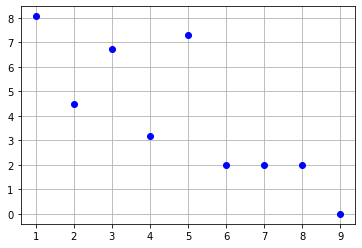

In [ ]:
#////////////////////////////////////////////////////////////////Steepest Descent////////////////////////////////////////////////////////////
X0 = [0.01,0,0.01]
Xnew = [0,0,0]
k=0
gradient[0] = F1(X0[0],X0[1],X0[2])
gradient[1] = F2(X0[0],X0[1],X0[2])
gradient[2] = F3(X0[0],X0[1],X0[2])
def Min_Eeta(X0 = []):
  def F_of_eeta(eeta):
    Xnew = X0 - eeta*gradient
    return F(Xnew[0],Xnew[1],Xnew[2])
  return minimize(F_of_eeta,0.5)

eeta = Min_Eeta(X0).x
F(X0[0],X0[1],X0[2])-eeta*gradient

while Gradient_Magnitude()> Epsilon:
  k = k+1
  eeta = Min_Eeta(X0).x
  Xnew = X0 - eeta*gradient
  X0 = Xnew
  gradient[0] = F1(X0[0],X0[1],X0[2])
  gradient[1] = F2(X0[0],X0[1],X0[2])
  gradient[2] = F3(X0[0],X0[1],X0[2])
  plt.figure(1)
  plt.plot(k,Gradient_Magnitude(),'bo')
  plt.grid(True)
  #print(eeta)

print("minimum point:",Xnew)
print("local minmum of F(x1,x2,x3)")
print(F(Xnew[0],Xnew[1],Xnew[2]))
print("Number of iterations:",k)

